In [59]:
import sys
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import talib
import torch.utils.data as Data
import matplotlib.pyplot as plt

In [2]:
sys.path.append('../../')
import  DataSource
import Utils
zz500 = DataSource.get_zz500_codes() # 我看中证500的数据

In [3]:
dt = DataSource.get_data(zz500[0])
dt.head()

,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST
date,,,,,,,,,,,,,
2010-01-04,sh.600004,5.046509,5.111144,5.041537,5.046509,5.046509,15478854,157747809.0,2,1.525010,1,0.0000,0
2010-01-05,sh.600004,5.046509,5.091256,5.041537,5.066397,5.046509,11070922,112683563.0,2,1.090731,1,0.3941,0
2010-01-06,sh.600004,5.056453,5.066397,4.981874,4.991818,5.066397,9410665,95205863.0,2,0.927159,1,-1.4720,0
2010-01-07,sh.600004,4.971930,4.996790,4.827744,4.862548,4.991818,8961813,88611912.0,2,0.882937,1,-2.5896,0
2010-01-08,sh.600004,4.837688,5.096228,4.837688,5.061425,4.862548,14923812,149969456.0,2,1.470326,1,4.0900,0


In [7]:
dt['rate']=(dt['close']-dt['preclose'])/dt['preclose'] * 100
# 涨跌幅度的百分比

In [8]:
dt.head()

,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST,rate
date,,,,,,,,,,,,,,
2010-01-04,sh.600004,5.046509,5.111144,5.041537,5.046509,5.046509,15478854,157747809.0,2,1.525010,1,0.0000,0,0.000000
2010-01-05,sh.600004,5.046509,5.091256,5.041537,5.066397,5.046509,11070922,112683563.0,2,1.090731,1,0.3941,0,0.394089
2010-01-06,sh.600004,5.056453,5.066397,4.981874,4.991818,5.066397,9410665,95205863.0,2,0.927159,1,-1.4720,0,-1.472031
2010-01-07,sh.600004,4.971930,4.996790,4.827744,4.862548,4.991818,8961813,88611912.0,2,0.882937,1,-2.5896,0,-2.589641
2010-01-08,sh.600004,4.837688,5.096228,4.837688,5.061425,4.862548,14923812,149969456.0,2,1.470326,1,4.0900,0,4.089980


我打算做一个，横轴x是涨跌幅度，而纵轴y是rsi的的值  
然后，涨跌幅度，我打算取得小数位1位，然后rsi，直接取整吧

In [9]:
dt["rsi14"] = talib.RSI(dt['close'], timeperiod=14)

In [11]:
dt.tail()

,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST,rate,rsi14
date,,,,,,,,,,,,,,,
2025-02-24,sh.600004,9.12,9.18,9.10,9.17,9.13,14626156,1.337640e+08,2,0.6180,1,0.4381,0,0.438116,42.252704
2025-02-25,sh.600004,9.14,9.15,9.07,9.09,9.17,15012850,1.366958e+08,2,0.6343,1,-0.8724,0,-0.872410,37.600734
2025-02-26,sh.600004,9.10,9.13,9.07,9.13,9.09,14994485,1.363845e+08,2,0.6336,1,0.4400,0,0.440044,41.092975
2025-02-27,sh.600004,9.12,9.23,9.12,9.19,9.13,20983933,1.926273e+08,2,0.8866,1,0.6572,0,0.657174,45.977015
2025-02-28,sh.600004,9.18,9.21,9.08,9.11,9.19,14763552,1.350106e+08,2,0.6238,1,-0.8705,0,-0.870511,41.085694


In [12]:
dt2 = dt.iloc[14:,:]

In [13]:
dt2.head()

,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST,rate,rsi14
date,,,,,,,,,,,,,,,
2010-01-22,sh.600004,5.419404,5.757495,5.374656,5.508898,5.389572,40618213,454945617.0,2,4.001794,1,2.2140,0,2.214022,67.032967
2010-01-25,sh.600004,5.523814,5.608337,5.265274,5.275218,5.508898,20104855,219784238.0,2,1.980774,1,-4.2419,0,-4.241877,56.548609
2010-01-26,sh.600004,5.275218,5.334881,5.071369,5.165835,5.275218,14489380,151123512.0,2,1.427525,1,-2.0735,0,-2.073516,52.415979
2010-01-27,sh.600004,5.170807,5.215555,5.076341,5.111144,5.165835,7765864,80360216.0,2,0.765110,1,-1.0587,0,-1.058710,50.431435
2010-01-28,sh.600004,5.111144,5.334881,5.071369,5.324937,5.111144,15788529,165734777.0,2,1.555520,1,4.1829,0,4.182879,57.245947


In [15]:
print(f'rsi最小值:{dt2["rsi14"].min()}, rsi最大值:{dt2["rsi14"].max()}')

rsi最小值:8.611963786722383, rsi最大值:84.55310775870144


In [16]:
print(f'涨跌幅最小值:{dt2["rate"].min()}, 涨跌幅最大值:{dt2["rate"].max()}')

涨跌幅最小值:-10.02691790040377, 涨跌幅最大值:10.035587188612096


粗略估算，rsi的范围是0-100，大概是101个，而涨跌幅是-10到10，大概是200个，我这里更改一下，横轴是rsi，纵轴是涨跌幅度吧，这样直观一些。

In [50]:
# 这里做一个二维数组
_x_count = 100-0 + 1
_y_count = (10-(-10)) * 10 + 1
bitmap = np.zeros((_y_count, _x_count))

In [51]:
bitmap.shape

(201, 101)

In [52]:
for index, row in dt2.iterrows():
    # 遍历每一行
    _rate = row['rate']
    _rsi = row['rsi14']
    _x_index = int(_rsi) # 对于rsi是取整
    _y_index = int(_rate * 10) - -100
    bitmap[_y_index, _x_index] += 1

In [53]:
bitmap

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
bitmap.max()

11.0

In [55]:
len(dt2)

3665

所以，看起来每个的数量不大，这里做一下扩充，

In [56]:
len(bitmap)

201

In [57]:
_bitmap_max = bitmap.max()
for i in range(len(bitmap)):
    for j in range(len(bitmap[i])):
        v = bitmap[i,j]
        bitmap[i,j] = int(v / _bitmap_max * 255)

In [58]:
bitmap.max()

255.0

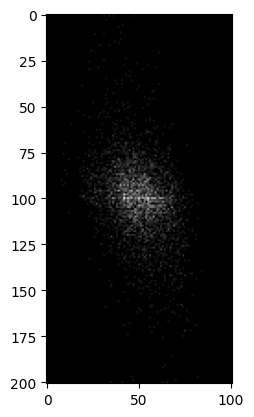

In [62]:
# 然后这个bitmap显示图像
plt.imshow(bitmap, cmap='gray', vmin=0, vmax=255)

就图像上看，并没有看出明显的区别。